In [1]:
# General System Imports
import datetime
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# Scientific libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local code.
sys.path.append(os.path.join(os.getcwd(), "..", "code"))
from peck_data import load_pecking_days 


# The standard color table of Etho Call-types
callColor = {
        'Be':(0/255.0, 230/255.0, 255/255.0),
        'BE':(0/255.0, 230/255.0, 255/255.0),
        'Tu':(255/255.0, 200/255.0, 65/255.0),
        'TU':(255/255.0, 200/255.0, 65/255.0),
        'Th':(255/255.0, 150/255.0, 40/255.0),
        'TH':(255/255.0, 150/255.0, 40/255.0),
        'Alarm':(255/255.0, 200/255.0, 65/255.0),
        'Di':(255/255.0, 105/255.0, 15/255.0),
        'DI':(255/255.0, 105/255.0, 15/255.0),
        'Ag':(255/255.0, 0/255.0, 0/255.0),
        'AG':(255/255.0, 0/255.0, 0/255.0),
        'Fight':(255/255.0, 105/255.0, 15/255.0),
        'Wh':(255/255.0, 180/255.0, 255/255.0),
        'WH':(255/255.0, 180/255.0, 255/255.0),
        'Ne':(255/255.0, 100/255.0, 255/255.0),
        'NE':(255/255.0, 100/255.0, 255/255.0),
        'Te':(140/255.0, 100/255.0, 185/255.0),
        'TE':(140/255.0, 100/255.0, 185/255.0),
        'Soft':(255/255.0, 180/255.0, 255/255.0),
        'DC':(100/255.0, 50/255.0, 200/255.0),
        'LT':(0/255.0, 95/255.0, 255/255.0),
        'Loud':(100/255.0, 50/255.0, 200/255.0),
        'song':(0, 0, 0),
        'So':(0,0,0), 
        'SO':(0,0,0),
        'In': (0.49,0.60,0.55), 
        'Mo':(0.69,0.39,0.39),
        'Ri':(0,255/255.0,0),
        'WC': (.25, .25, .25)}

In [2]:
# The diretory for saving figures - Change to place of your choice
figDir = os.path.expanduser('~/Desktop/')

# The behavioral data is stored in csv files in the data directory
DATADIR = "../data/behavior/"

In [3]:
def cached_load(bird, date, date_end=None, call_type = None, minRT = 0):
    if (bird, date, date_end, minRT) not in cached_load._cache:
        print('Needs to load data')
        if date_end is not None:
            blocks, stim_blocks = load_pecking_days(os.path.join(DATADIR, bird), date_range=(date, date_end), call_type = call_type, minRT = minRT)
            cached_load._cache[(bird, date, date_end, minRT)] = (blocks, stim_blocks)
            print(blocks)
        else:
            blocks, stim_blocks = load_pecking_days(os.path.join(DATADIR, bird, date.strftime("%d%m%y")), call_type = call_type, minRT = minRT)
            cached_load._cache[(bird, date, date_end, minRT)] = (blocks, stim_blocks)
            print(blocks)

    return cached_load._cache[(bird, date, date_end, minRT)]

cached_load._cache = {}



In [4]:
# The start and end dates for all birds on all calls
bird_dates = {
    "HpiHpi1625F" : {
        "Te": {"start": datetime.date(2017, 4, 5), "end": datetime.date(2017, 4, 7)},
        "Tu": {"start": datetime.date(2017, 4, 8), "end": datetime.date(2017, 4, 9)},
        "Di": {"start": datetime.date(2017, 4, 10), "end": datetime.date(2017, 4, 12)},
        "Th": {"start": datetime.date(2017, 4, 13), "end": datetime.date(2017, 4, 16)},
        "Ag": {"start": datetime.date(2017, 4, 17), "end": datetime.date(2017, 4, 18)},
        "Wh": {"start": datetime.date(2017, 4, 19), "end": datetime.date(2017, 4, 20)},
        "So": {"start": datetime.date(2017, 4, 21), "end": datetime.date(2017, 4, 21)},
        "Be": {"start": datetime.date(2017, 4, 22), "end": datetime.date(2017, 4, 22)},
        "DC": {"start": datetime.date(2017, 4, 23), "end": datetime.date(2017, 4, 24)},
        "Ne": {"start": datetime.date(2017, 4, 25), "end": datetime.date(2017, 4, 26)},
        "LT": {"start": datetime.date(2017, 4, 27), "end": datetime.date(2017, 4, 28)},
    },
    # This bird injured her leg during LT tests on 20/26
   # "LblGra2025F" : {
   #    "Te": {"start": datetime.date(2016, 10, 16), "end": datetime.date(2016, 10, 19)},
   #    "Tu": {"start": datetime.date(2016, 10, 29), "end": datetime.date(2016, 10, 31)},
   #    "Di": {"start": datetime.date(2016, 11, 2), "end": datetime.date(2016, 11, 6)},
   #    "Th": {"start": datetime.date(2016, 10, 20), "end": datetime.date(2016, 10, 22)},
   #    "Ag": {"start": datetime.date(2016, 11, 1), "end": datetime.date(2016, 11, 1)},
   #    "Wh": {"start": datetime.date(2016, 10, 12), "end": datetime.date(2016, 10, 13)},
   #    "So": {"start": datetime.date(2016, 10, 14), "end": datetime.date(2016, 10, 15)},
   #    "Be": {"start": datetime.date(2016, 10, 23), "end": datetime.date(2016, 10, 24)},
   #    "DC": {"start": datetime.date(2016, 10, 10), "end": datetime.date(2016, 10, 11)},
   #    "Ne": {"start": datetime.date(2016, 11, 7), "end": datetime.date(2016, 11, 12)},
   #    "LT": {"start": datetime.date(2016, 10, 25), "end": datetime.date(2016, 10, 28)},
   # },
    "HpiHpi1918M" : {
        "Te": {"start": datetime.date(2017, 2, 28), "end": datetime.date(2017, 3, 1)},
        "Tu": {"start": datetime.date(2017, 2, 26), "end": datetime.date(2017, 2, 27)},
        "Di": {"start": datetime.date(2017, 2, 14), "end": datetime.date(2017, 2, 15)},
        "Th": {"start": datetime.date(2017, 2, 12), "end": datetime.date(2017, 2, 13)},
        "Ag": {"start": datetime.date(2017, 2, 23), "end": datetime.date(2017, 2, 23)},
        "Wh": {"start": datetime.date(2017, 2, 20), "end": datetime.date(2017, 2, 21)},
        "So": {"start": datetime.date(2017, 2, 25), "end": datetime.date(2017, 2, 25)},
        "Be": {"start": datetime.date(2017, 2, 16), "end": datetime.date(2017, 2, 16)},
        "DC": {"start": datetime.date(2017, 2, 19), "end": datetime.date(2017, 2, 19)},
        "Ne": {"start": datetime.date(2017, 2, 24), "end": datetime.date(2017, 2, 24)},
        "LT": {"start": datetime.date(2017, 2, 22), "end": datetime.date(2017, 2, 22)},
    },
    "HpiGra1242F" : {
        "Te": {"start": datetime.date(2016, 12, 4), "end": datetime.date(2016, 12, 6)},
        "Tu": {"start": datetime.date(2016, 11, 30), "end": datetime.date(2016, 11, 30)},
        "Di": {"start": datetime.date(2016, 12, 17), "end": datetime.date(2016, 12, 17)},
        "Th": {"start": datetime.date(2016, 12, 7), "end": datetime.date(2016, 12, 9)},
        "Ag": {"start": datetime.date(2016, 12, 10), "end": datetime.date(2016, 12, 10)},
        "Wh": {"start": datetime.date(2016, 12, 2), "end": datetime.date(2016, 12, 3)},
        "So": {"start": datetime.date(2016, 11, 11), "end": datetime.date(2016, 11, 12)},
        "Be": {"start": datetime.date(2016, 11, 13), "end": datetime.date(2016, 11, 14)},
        "DC": {"start":datetime.date(2016, 12, 1), "end": datetime.date(2016, 12, 1)},
        "Ne": {"start": datetime.date(2016, 12, 13), "end": datetime.date(2016, 12, 16)},
        "LT": {"start": datetime.date(2016, 12, 11), "end": datetime.date(2016, 12, 12)},
    },
    "GreLbl3131M" : {
       "Te": {"start": datetime.date(2016, 12, 18), "end": datetime.date(2016, 12, 21)},
       "Tu": {"start": datetime.date(2016, 12, 24), "end": datetime.date(2016, 12, 25)},
       "Di": {"start": datetime.date(2016, 12, 17), "end": datetime.date(2016, 12, 17)},
       "Th": {"start": datetime.date(2017, 1, 19), "end": datetime.date(2017, 1, 23)},
       "Ag": {"start": datetime.date(2017, 1, 3), "end": datetime.date(2017, 1, 6)},
       "Wh": {"start": datetime.date(2016, 12, 14), "end": datetime.date(2016, 12, 15)},
       "So": {"start": (datetime.date(2016, 12, 12), datetime.date(2016, 12, 16)) , 
              "end": (datetime.date(2016, 12, 12), datetime.date(2016, 12, 16)) },
       "Be": {"start": datetime.date(2016, 12, 13), "end": datetime.date(2016, 12, 13)},
       "DC": {"start": datetime.date(2017, 1, 24), "end": datetime.date(2017, 1, 27)},
       "Ne": {"start": datetime.date(2016, 12, 22), "end": datetime.date(2016, 12, 23)},
       "LT": {"start": datetime.date(2017, 1, 7), "end": datetime.date(2017, 1, 10)},
    },
    "GreLbl1635F" : {
        "Te": {"start": datetime.date(2017, 5, 24), "end": datetime.date(2017, 5, 24)},
        "Tu": {"start": datetime.date(2017, 5, 14), "end": datetime.date(2017, 5, 15)},
        "Di": {"start": datetime.date(2017, 5, 16), "end": datetime.date(2017, 5, 17)},
        "Th": {"start": datetime.date(2017, 5, 21), "end": datetime.date(2017, 5, 21)},
        "Ag": {"start": datetime.date(2017, 5, 18), "end": datetime.date(2017, 5, 18)},
        "Wh": {"start": datetime.date(2017, 5, 12), "end": datetime.date(2017, 5, 13)},
        "So": {"start": datetime.date(2017, 5, 20), "end": datetime.date(2017, 5, 20)},
        "Be": {"start": datetime.date(2017, 5, 19), "end": datetime.date(2017, 5, 19)},
        "DC": {"start": datetime.date(2017, 5, 10), "end": datetime.date(2017, 5, 11)},
        "Ne": {"start": datetime.date(2017, 5, 8),  "end": datetime.date(2017, 5, 9)},
        "LT": {"start": datetime.date(2017, 5, 22), "end": datetime.date(2017, 5, 23)},
    },
    "GraLbl4833M" : {
        "Te": {"start": datetime.date(2017, 4, 9), "end": datetime.date(2017, 4, 9)},
        "Tu": {"start": datetime.date(2017, 4, 12), "end": datetime.date(2017, 4, 13)},
        "Di": {"start": datetime.date(2017, 4, 17), "end": datetime.date(2017, 4, 18)},
        "Th": {"start": datetime.date(2017, 4, 6), "end": datetime.date(2017, 4, 6)},
        "Ag": {"start": datetime.date(2017, 4, 14), "end": datetime.date(2017, 4, 16)},
        "Wh": {"start": datetime.date(2017, 4, 19), "end": datetime.date(2017, 4, 20)},
        "So": {"start": datetime.date(2017, 4, 8), "end": datetime.date(2017, 4, 8)},
        "Be": {"start": datetime.date(2017, 4, 10), "end": datetime.date(2017, 4, 11)},
        "DC": {"start": datetime.date(2017, 4, 5), "end": datetime.date(2017, 4, 5)},
        "Ne": {"start": datetime.date(2017, 4, 21), "end": datetime.date(2017, 4, 21)},
        "LT": {"start": datetime.date(2017, 4, 7), "end": datetime.date(2017, 4, 7)},
    },
    "GraLbl1718F" : {
        "Te": {"start": datetime.date(2017, 4, 9), "end": datetime.date(2017, 4, 9)},
        "Tu": {"start": datetime.date(2017, 4, 4), "end": datetime.date(2017, 4, 5)},
        "Di": {"start": datetime.date(2017, 4, 12), "end": datetime.date(2017, 4, 12)},
        "Th": {"start": datetime.date(2017, 4, 6), "end": datetime.date(2017, 4, 6)},
        "Ag": {"start": datetime.date(2017, 4, 10), "end": datetime.date(2017, 4, 11)},
        "Wh": {"start": datetime.date(2017, 4, 8), "end": datetime.date(2017, 4, 8)},
        "So": {"start": datetime.date(2017, 3, 30), "end": datetime.date(2017, 3, 30)},
        "Be": {"start": datetime.date(2017, 3, 29), "end": datetime.date(2017, 3, 29)},
        "DC": {"start": datetime.date(2017, 4, 7), "end": datetime.date(2017, 4, 7)},
        "Ne": {"start": datetime.date(2017, 3, 31), "end": datetime.date(2017, 3, 31)},
        "LT": {"start": datetime.date(2017, 4, 1), "end": datetime.date(2017, 4, 3)},
    },
    # Removing because of no Ne Call
    "GraGre0917M" : { 
        "Te": {"start": datetime.date(2017, 3, 28), "end": datetime.date(2017, 3, 28)},
        "Tu": {"start": datetime.date(2017, 3, 27), "end": datetime.date(2017, 3, 27)},
        "Di": {"start": datetime.date(2017, 4, 1), "end": datetime.date(2017, 4, 1)},
        "Th": {"start": datetime.date(2017, 4, 3), "end": datetime.date(2017, 4, 4)},
        "Ag": {"start": datetime.date(2017, 3, 31), "end": datetime.date(2017, 3, 31)},
        "Wh": {"start": datetime.date(2017, 4, 8), "end": datetime.date(2017, 4, 8)},
        "So": {"start": datetime.date(2017, 4, 6), "end": datetime.date(2017, 4, 6)},
        "Be": {"start": datetime.date(2017, 3, 29), "end": datetime.date(2017, 3, 29)},
        "DC": {"start": datetime.date(2017, 3, 30), "end": datetime.date(2017, 3, 30)},
        # "Ne": {"start": datetime.date(2017, 3, 31), "end": datetime.date(2017, 3, 31)},
         "LT": {"start": datetime.date(2017, 4, 7), "end": datetime.date(2017, 4, 7)},
    },
    "GraGra1918F" : {
        "Te": {"start": datetime.date(2017, 2, 10), "end": datetime.date(2017, 2, 10)},
        "Tu": {"start": datetime.date(2017, 2, 7), "end": datetime.date(2017, 2, 8)},
        "Di": {"start": datetime.date(2017, 2, 3), "end": datetime.date(2017, 2, 4)},
        "Th": {"start": datetime.date(2017, 2, 9), "end": datetime.date(2017, 2, 9)},
        "Ag": {"start": datetime.date(2017, 2, 6), "end": datetime.date(2017, 2, 6)},
        "Wh": {"start": datetime.date(2017, 1, 31), "end": datetime.date(2017, 2, 1)},
        "So": {"start": datetime.date(2017, 1, 30), "end": datetime.date(2017, 1, 30)},
        "Be": {"start": datetime.date(2017, 2, 12), "end": datetime.date(2017, 2, 13)},
        "DC": {"start": datetime.date(2017, 2, 11), "end": datetime.date(2017, 2, 11)},
        "Ne": {"start": datetime.date(2017, 2, 2), "end": datetime.date(2017, 2, 2)},
        "LT": {"start": datetime.date(2017, 2, 14), "end": datetime.date(2017, 2, 14)},
    },
    "LblWhi1566M" : {
        "Te": {"start": datetime.date(2017, 5, 17), "end": datetime.date(2017, 5, 19)},
        "Tu": {"start": datetime.date(2017, 5, 14), "end": datetime.date(2017, 5, 14)},
        "Di": {"start": datetime.date(2017, 5, 15), "end": datetime.date(2017, 5, 16)},
        "Th": {"start": datetime.date(2017, 5, 12), "end": datetime.date(2017, 5, 13)},
        "Ag": {"start": datetime.date(2017, 5, 3), "end": datetime.date(2017, 5, 4)},
        "Wh": {"start": datetime.date(2017, 5, 9), "end": datetime.date(2017, 5, 11)},
        "So": {"start": datetime.date(2017, 5, 5), "end": datetime.date(2017, 5, 5)},
        "Be": {"start": datetime.date(2017, 5, 6), "end": datetime.date(2017, 5, 6)},
        "DC": {"start": datetime.date(2017, 4, 30), "end": datetime.date(2017, 5, 2)},
        "Ne": {"start": datetime.date(2017, 5, 20), "end": datetime.date(2017, 5, 20)},
        "LT": {"start": datetime.date(2017, 5, 7), "end": datetime.date(2017, 5, 8)},
    },
    "LblGra3039M" : {
        "Te": {"start": datetime.date(2017, 2, 21), "end": datetime.date(2017, 2, 24)}, # also 3/20-3/22 but ignore them
        "Tu": {"start": (datetime.date(2017, 3, 17), datetime.date(2017, 3, 23)), 
               "end": (datetime.date(2017, 3, 19), datetime.date(2017, 3, 23)) }, # = 17, 18, 19 and 23!
        "Di": {"start": datetime.date(2017, 3, 4), "end": datetime.date(2017, 3, 5)},
        "Th": {"start": datetime.date(2017, 3, 8), "end": datetime.date(2017, 3, 10)},
        "Ag": {"start": datetime.date(2017, 2, 26), "end": datetime.date(2017, 2, 27)},
        "Wh": {"start": datetime.date(2017, 3, 11), "end": datetime.date(2017, 3, 13)},
        "So": {"start": datetime.date(2017, 2, 25), "end": datetime.date(2017, 2, 25)},
        "Be": {"start": datetime.date(2017, 3, 14), "end": datetime.date(2017, 3, 16)},
        "DC": {"start": datetime.date(2017, 3, 6), "end": datetime.date(2017, 3, 7)},
        "Ne": {"start": datetime.date(2017, 2, 28), "end": datetime.date(2017, 3, 1)},
        "LT": {"start": datetime.date(2017, 3, 2), "end": datetime.date(2017, 3, 3)},
    },
    "LblGra2826F" : {
        "Te": {"start": datetime.date(2016, 10, 30), "end": datetime.date(2016, 11, 1)},
        "Tu": {"start": datetime.date(2016, 11, 4), "end": datetime.date(2016, 11, 6)},
        "Di": {"start": datetime.date(2016, 11, 7), "end": datetime.date(2016, 11, 10)},
        "Th": {"start": datetime.date(2016, 11, 16), "end": datetime.date(2016, 11, 17)},
        "Ag": {"start": datetime.date(2016, 10, 24), "end": datetime.date(2016, 10, 25)},
        "Wh": {"start": datetime.date(2016, 10, 29), "end": datetime.date(2016, 10, 29)},
        "So": {"start": datetime.date(2016, 11, 14), "end": datetime.date(2016, 11, 15)},
        "Be": {"start": datetime.date(2016, 11, 2), "end": datetime.date(2016, 11, 3)},
        "DC": {"start": datetime.date(2016, 11, 11), "end": datetime.date(2016, 11, 13)},
        "Ne": {"start": datetime.date(2016, 10, 26), "end": datetime.date(2016, 10, 28)},
        "LT": {"start": datetime.date(2016, 10, 21), "end": datetime.date(2016, 10, 23)},
    }
}


In [5]:

nbirds = len(bird_dates)
print('Processing %d birds' % nbirds)

nmales = 0
nfemales = 0
testedCalDays = []
testedDays = []
for bird in bird_dates.keys():
    
    if bird[-1] == 'M':
        nmales +=1
    elif bird[-1] == 'F':
        nfemales +=1
    startDate = datetime.date(2020, 1, 1)
    endDate = datetime.date(2010, 1, 1)
    testedBirdDays = datetime.timedelta(0)
    for callType in bird_dates[bird].keys():
        start_date = bird_dates[bird][callType]["start"]
        end_date = bird_dates[bird][callType]["end"]
        if type(start_date) is tuple :
            for date in start_date:
                if ( date < startDate ):
                    startDate = date         
        else:
            if ( start_date < startDate):
                startDate = start_date 
        if type(end_date) is tuple :
            for date in end_date:
                if ( date > endDate ):
                    endDate = date         
        else:
            if ( end_date > endDate):
                endDate = end_date 
 
        if type(start_date) is tuple:
            for sdate, edate in zip(start_date, end_date):
                testedBirdDays = testedBirdDays + (edate - sdate) + datetime.timedelta(days=1)
        else:
            testedBirdDays = testedBirdDays + (end_date - start_date) + datetime.timedelta(days=1)
    print(bird, " Tested Calendar days: ", endDate - startDate, " Testing Days: ", testedBirdDays)

    testedCalDays.append(endDate - startDate) 
    testedDays.append(testedBirdDays)       

print('\t %d males and %d females' % (nmales, nfemales))

Processing 12 birds
HpiHpi1625F  Tested Calendar days:  23 days, 0:00:00  Testing Days:  24 days, 0:00:00
HpiHpi1918M  Tested Calendar days:  17 days, 0:00:00  Testing Days:  16 days, 0:00:00
HpiGra1242F  Tested Calendar days:  36 days, 0:00:00  Testing Days:  22 days, 0:00:00
GreLbl3131M  Tested Calendar days:  46 days, 0:00:00  Testing Days:  31 days, 0:00:00
GreLbl1635F  Tested Calendar days:  16 days, 0:00:00  Testing Days:  17 days, 0:00:00
GraLbl4833M  Tested Calendar days:  16 days, 0:00:00  Testing Days:  17 days, 0:00:00
GraLbl1718F  Tested Calendar days:  14 days, 0:00:00  Testing Days:  15 days, 0:00:00
GraGre0917M  Tested Calendar days:  12 days, 0:00:00  Testing Days:  11 days, 0:00:00
GraGra1918F  Tested Calendar days:  15 days, 0:00:00  Testing Days:  15 days, 0:00:00
LblWhi1566M  Tested Calendar days:  20 days, 0:00:00  Testing Days:  21 days, 0:00:00
LblGra3039M  Tested Calendar days:  30 days, 0:00:00  Testing Days:  28 days, 0:00:00
LblGra2826F  Tested Calendar days:

In [7]:
print('Total number of testing days', np.sum(testedDays))

Total number of testing days 245 days, 0:00:00


In [8]:
# load data

# Later we will set a min RT at 500 ms because there are double pecks at trial initiation.
minRT = 0
# Make a single array of response times to check out distribution
rt = np.array([])
dt = np.array([])
rtRe = np.array([])
rtUnRe = np.array([])

birdRT = []
birdDT = []
birdRTRe = []
birdRTUnRe = []
for bird in bird_dates:
    rtBird = np.array([])
    dtBird = np.array([])
    rtReBird = np.array([])
    rtUnReBird = np.array([])
    
    for cty in bird_dates[bird]:
        # blocks, stim_blocks = load_pecking_days(os.path.join(DATADIR, bird), date_range=(bird_dates[bird][cty]['start'], bird_dates[bird][cty]['end']), call_type = cty)
        blocks, stim_blocks = cached_load(bird, bird_dates[bird][cty]['start'], date_end=bird_dates[bird][cty]['end'],  call_type = cty, minRT = minRT)
        bird_dates[bird][cty]['n_trials'] = 0
        for block in blocks:
            bird_dates[bird][cty]['n_trials'] += len(block.data)
            rt = np.concatenate((rt, pd.to_timedelta(block.data.RT.array).total_seconds()))
            dt = np.concatenate((dt, (pd.to_timedelta(block.data['Time'].array[1:-1] - block.data['Time'].array[0:-2])).total_seconds()))
            rtBird = np.concatenate((rtBird, pd.to_timedelta(block.data.RT.array).total_seconds()))
            dtBird = np.concatenate((dtBird, (pd.to_timedelta(block.data['Time'].array[1:-1] - block.data['Time'].array[0:-2])).total_seconds()))
            
            # Split into Re and UnRe
            dfRe = block.data.loc[block.data.Class == 'Rewarded']
            rtRe = np.concatenate((rtRe, pd.to_timedelta(dfRe.RT.array).total_seconds()))
            rtReBird = np.concatenate((rtReBird, pd.to_timedelta(dfRe.RT.array).total_seconds()))
            dfUnRe = block.data.loc[block.data.Class == 'Unrewarded']
            rtUnRe = np.concatenate((rtUnRe, pd.to_timedelta(dfUnRe.RT.array).total_seconds()))
            rtUnReBird = np.concatenate((rtUnReBird, pd.to_timedelta(dfUnRe.RT.array).total_seconds()))
        
        n_re_stim = 0
        n_unre_stim = 0
        n_re_trial = 0
        n_unre_trial = 0
        for stim in stim_blocks:
            n_re_trial += np.sum(stim.loc[stim['Class'] == 'Rewarded']['Trials'])
            n_re_stim += len(stim.loc[stim['Class'] == 'Rewarded']['Trials'])
            n_unre_trial += np.sum(stim.loc[stim['Class'] == 'Unrewarded']['Trials'])
            n_unre_stim += len(stim.loc[stim['Class'] == 'Unrewarded']['Trials'])

        bird_dates[bird][cty]['n_re_trials'] = n_re_trial
        bird_dates[bird][cty]['n_unre_trials'] = n_unre_trial
        bird_dates[bird][cty]['n_re_stim'] = n_re_stim
        bird_dates[bird][cty]['n_unre_stim'] = n_unre_stim
    
    birdRT.append(rtBird)
    birdDT.append(dtBird)
    birdRTRe.append(rtReBird)
    birdRTUnRe.append(rtUnReBird)

            
            

Needs to load data
Loading 2017-04-05 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-08 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-10 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-13 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-17 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-19 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-21 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-22 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-23 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-25 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-04-27 ../data/behavior/HpiHpi1625F
Needs to load data
Loading 2017-02-28 ../data/behavior/HpiHpi1918M
Needs to load data
Loading 2017-02-26 ../data/behavior/HpiHpi1918M
Needs to load data
Loading 2017-02-14 ../data/behavior/HpiHpi1918M
Needs to load data
Loading 2017-02-12 ../data/behavior/HpiHpi1

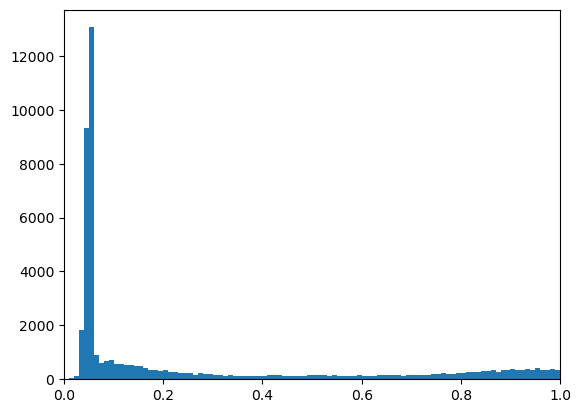

In [9]:
# Histogram of times between trials
plt.hist(dt, bins=600, range = (0, 6.0))
plt.xlim([0, 1.0])
plt.show()

--------------------------- HpiHpi1625F ------------------------------


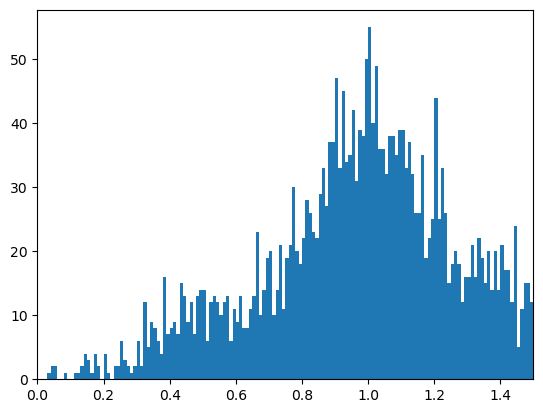

--------------------------- HpiHpi1918M ------------------------------


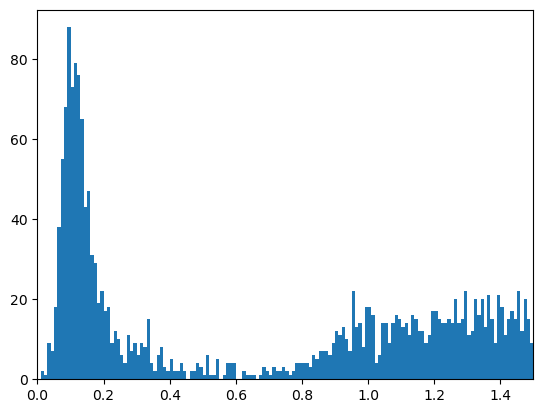

--------------------------- HpiGra1242F ------------------------------


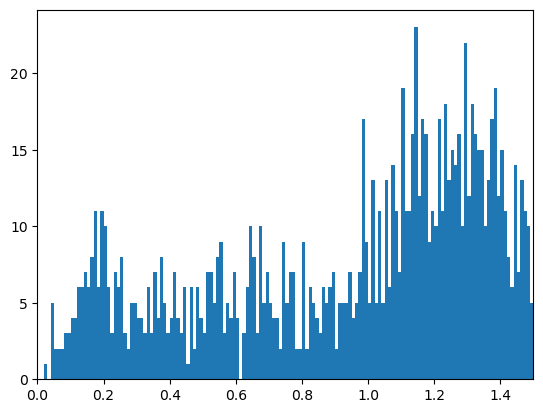

--------------------------- GreLbl3131M ------------------------------


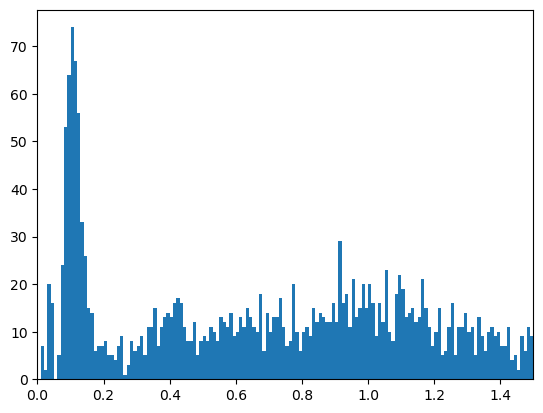

--------------------------- GreLbl1635F ------------------------------


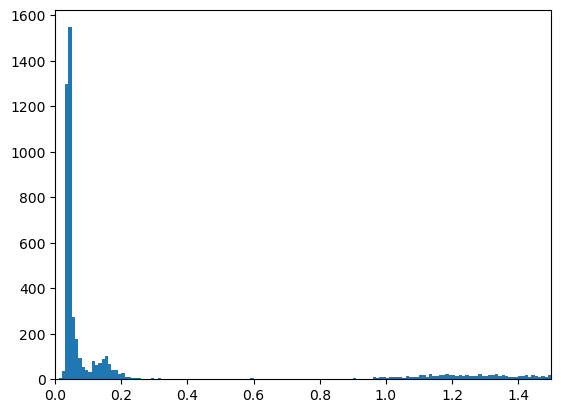

--------------------------- GraLbl4833M ------------------------------


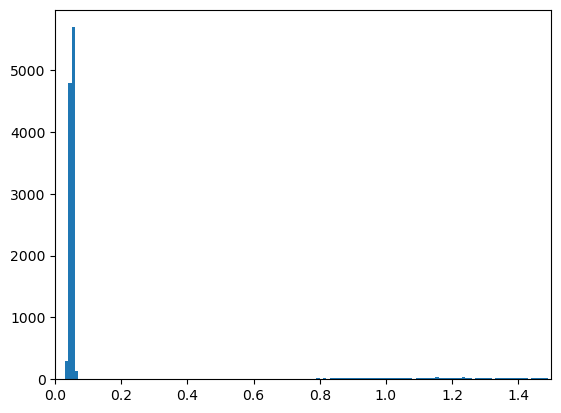

--------------------------- GraLbl1718F ------------------------------


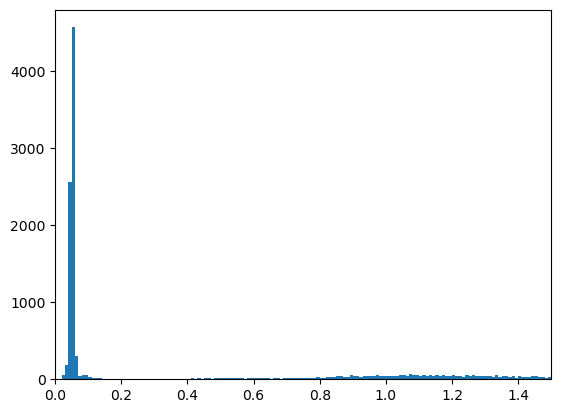

--------------------------- GraGre0917M ------------------------------


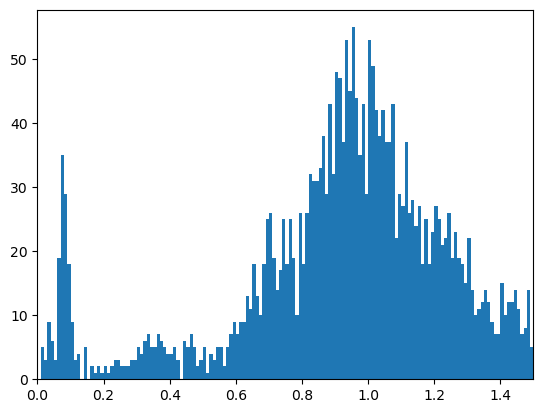

--------------------------- GraGra1918F ------------------------------


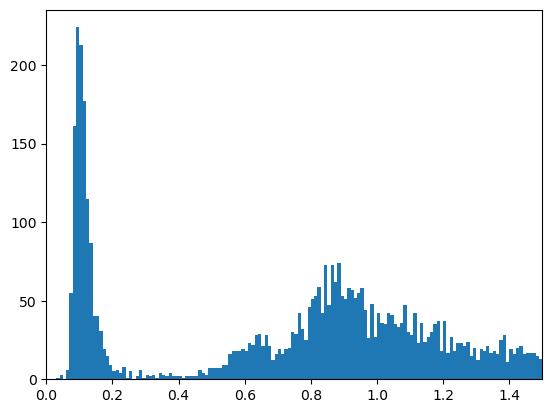

--------------------------- LblWhi1566M ------------------------------


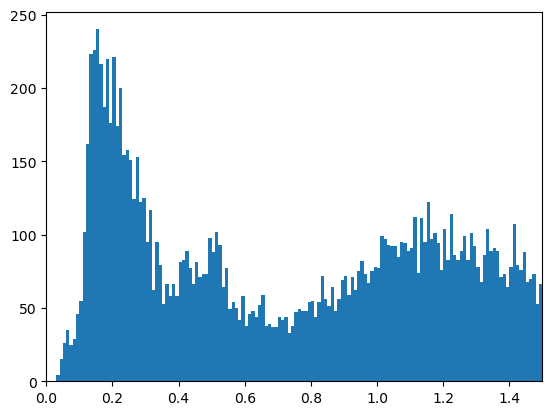

--------------------------- LblGra3039M ------------------------------


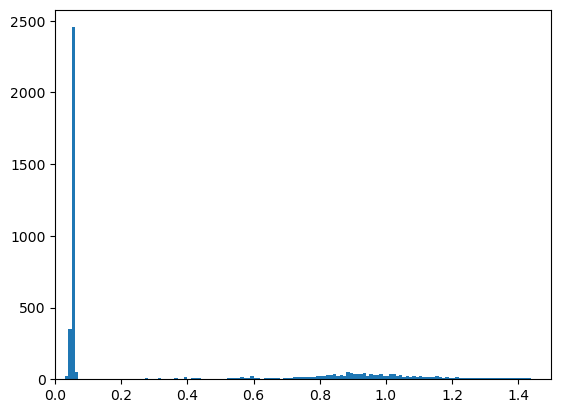

--------------------------- LblGra2826F ------------------------------


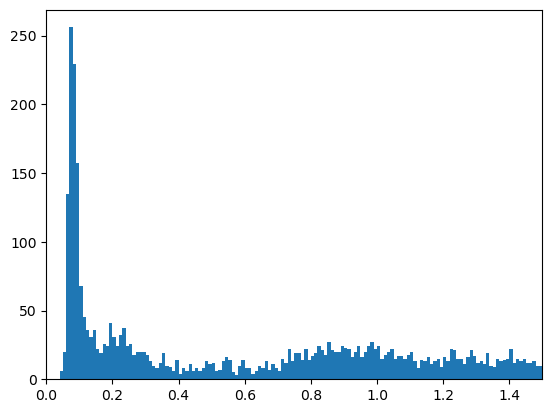

In [10]:
# Historgram or times between trials per bird.

for ibird, bird in enumerate(bird_dates):
    print('---------------------------', bird, '------------------------------')
    plt.hist(birdDT[ibird], bins=600, range = (0, 6.0))
    plt.xlim([0, 1.5])
    plt.show()


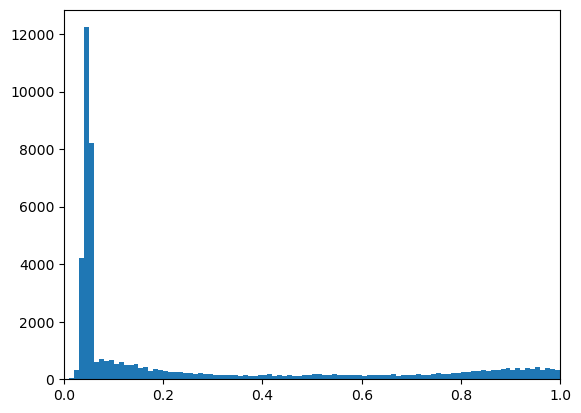

In [11]:
# Histogram of RT
plt.hist(rt, bins=600, range = (0.0, 6.0))
plt.xlim([0, 1.0])
plt.show()

--------------------------- HpiHpi1625F ------------------------------


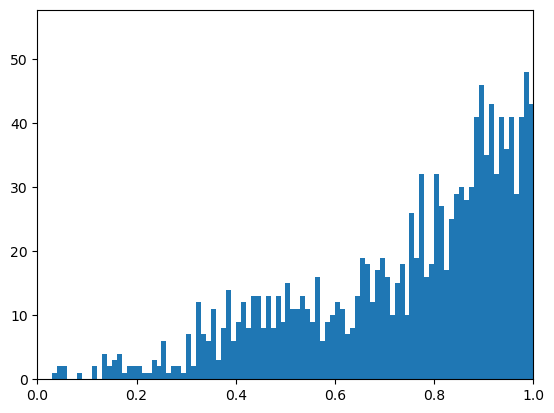

--------------------------- HpiHpi1918M ------------------------------


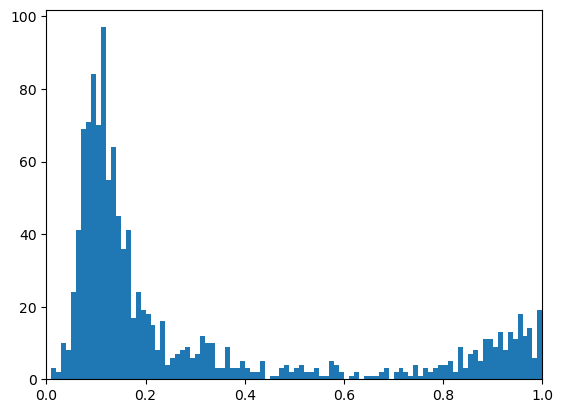

--------------------------- HpiGra1242F ------------------------------


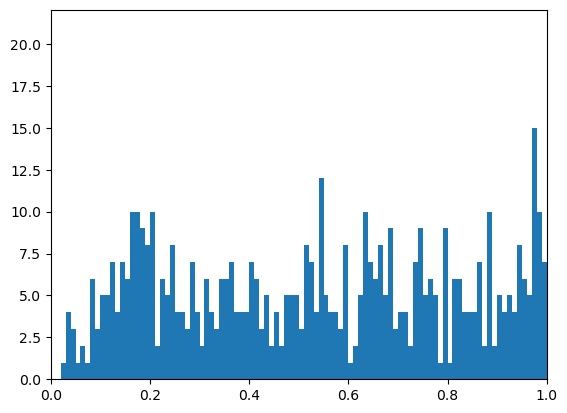

--------------------------- GreLbl3131M ------------------------------


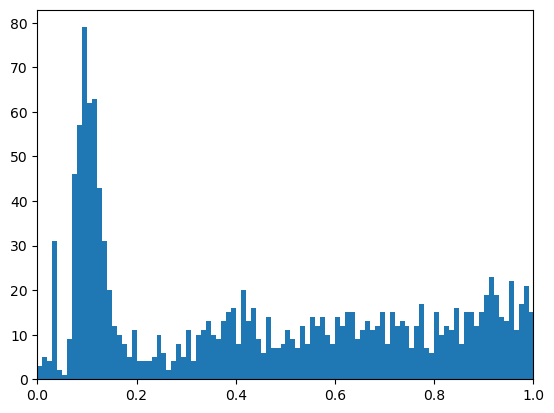

--------------------------- GreLbl1635F ------------------------------


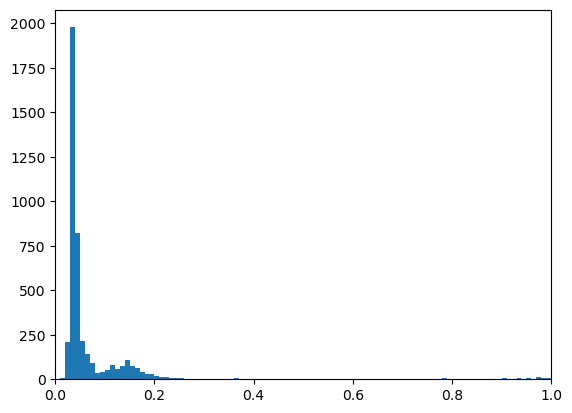

--------------------------- GraLbl4833M ------------------------------


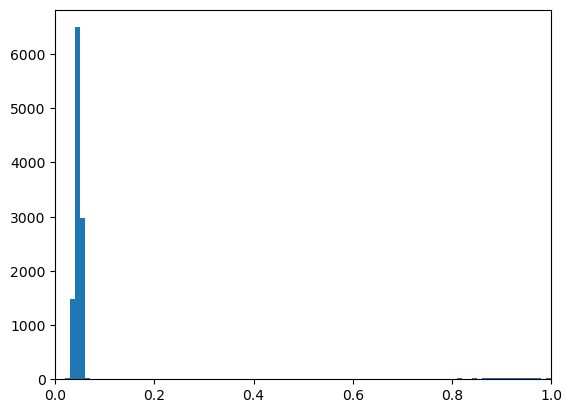

--------------------------- GraLbl1718F ------------------------------


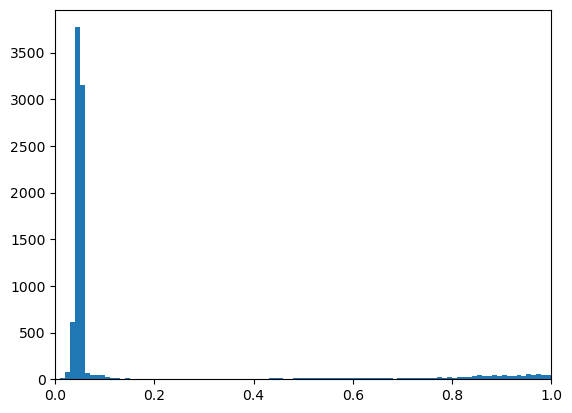

--------------------------- GraGre0917M ------------------------------


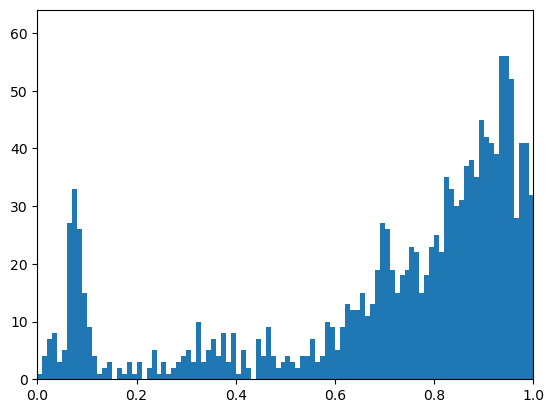

--------------------------- GraGra1918F ------------------------------


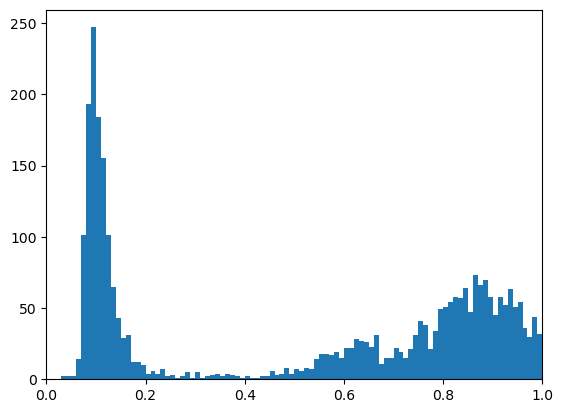

--------------------------- LblWhi1566M ------------------------------


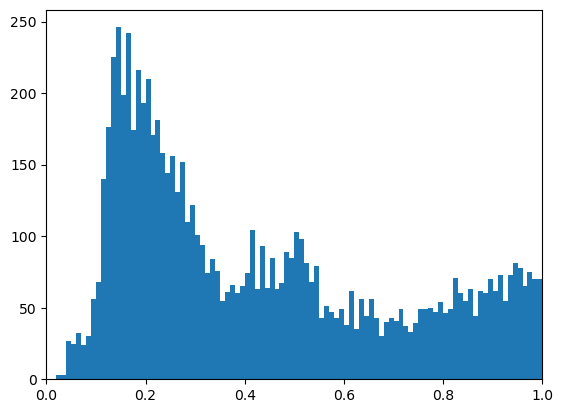

--------------------------- LblGra3039M ------------------------------


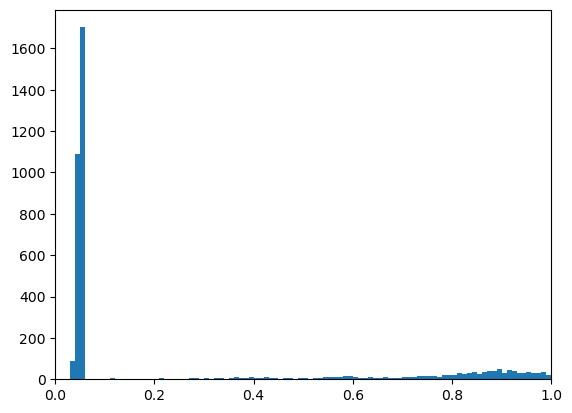

--------------------------- LblGra2826F ------------------------------


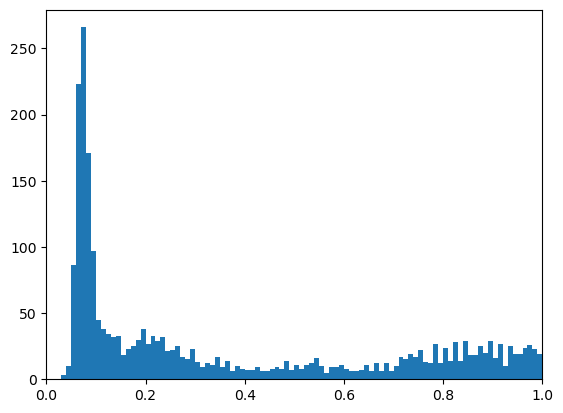

In [12]:
# Historgram of RTs  per bird.

for ibird, bird in enumerate(bird_dates):
    print('---------------------------', bird, '------------------------------')
    plt.hist(birdRT[ibird], bins=600, range = (0, 6.0))
    plt.xlim([0, 1.0])
    plt.show()


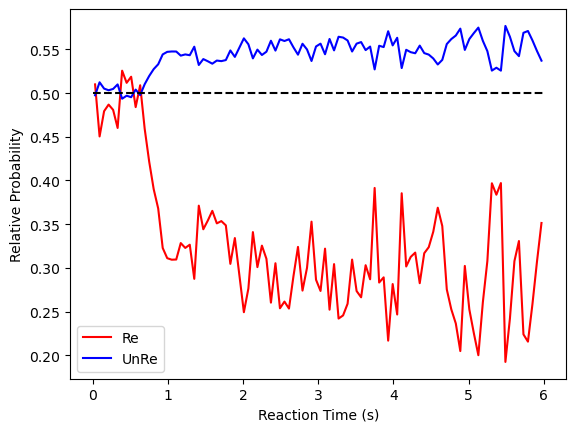

In [13]:
# Plot the probability of RT of Re vs UnRe as function of bin.

countRe, bin_edgesRe = np.histogram(rtRe, bins=100, range = (0.0, 6.0)) 
countUnRe, bin_edgesUnRe = np.histogram(rtUnRe, bins=100, range = (0.0, 6.0)) 

xbinRe = (bin_edgesRe[0:-1] + bin_edgesRe[1:])/2.0
xbinUnRe = (bin_edgesUnRe[0:-1] + bin_edgesUnRe[1:])/2.0

countTot = countRe + countUnRe

pRe = (countRe/countTot)/(2*0.2)
pNoRe = (countUnRe/countTot)/(2*0.8)

plt.plot(xbinRe, pRe, '-r', label = 'Re')
plt.plot(xbinUnRe, pNoRe, '-b', label = 'UnRe')
plt.plot([0, 6.0], [0.5, 0.5], 'k--')
plt.xlabel('Reaction Time (s)')
plt.ylabel('Relative Probability')
plt.legend()
plt.show()

--------------------------- HpiHpi1625F ------------------------------


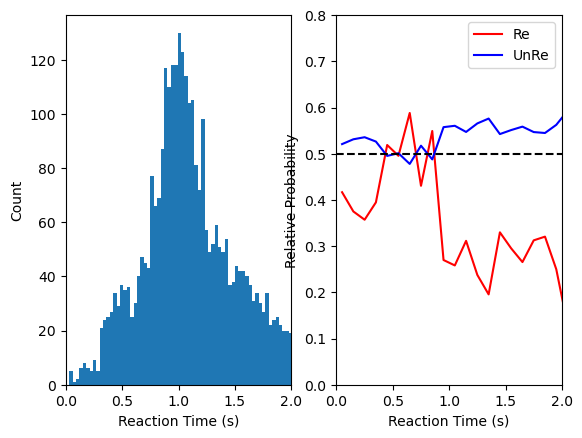

--------------------------- HpiHpi1918M ------------------------------


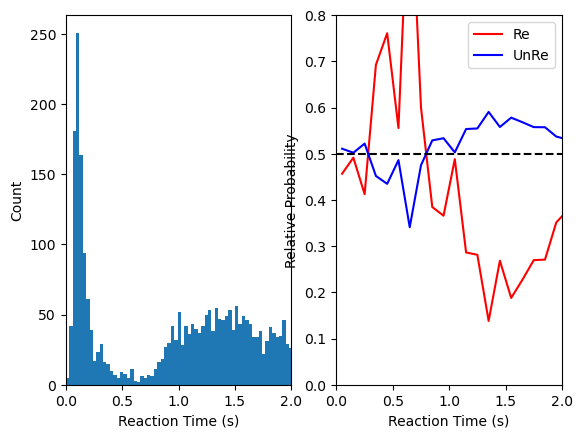

--------------------------- HpiGra1242F ------------------------------


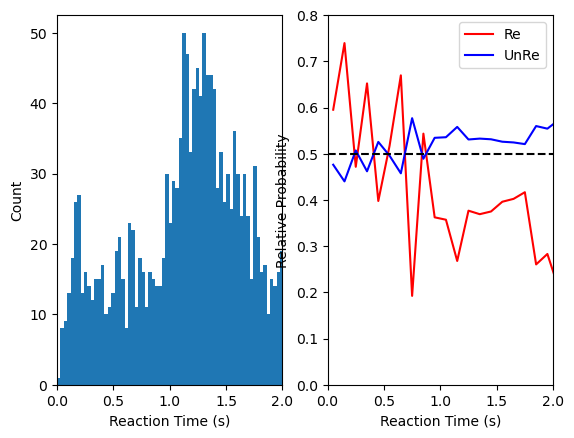

--------------------------- GreLbl3131M ------------------------------


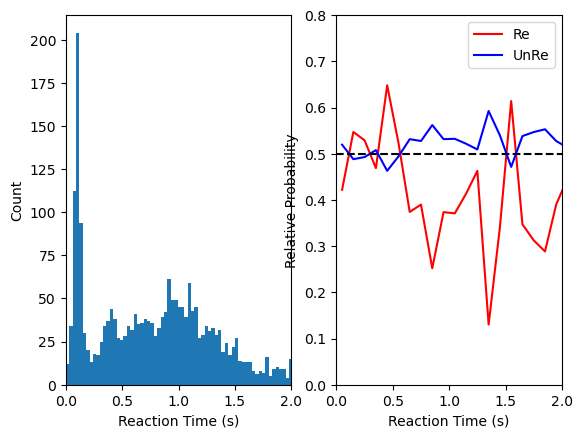

--------------------------- GreLbl1635F ------------------------------


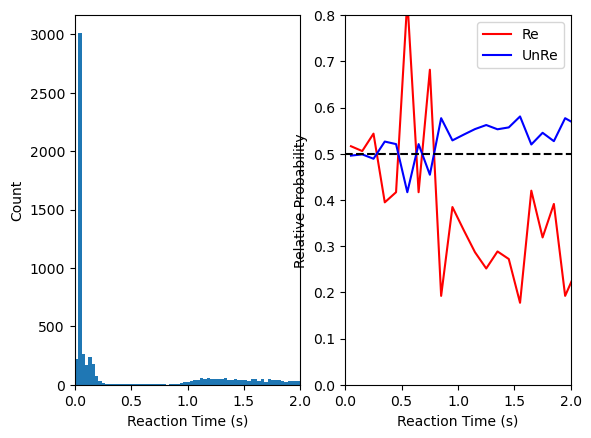

--------------------------- GraLbl4833M ------------------------------


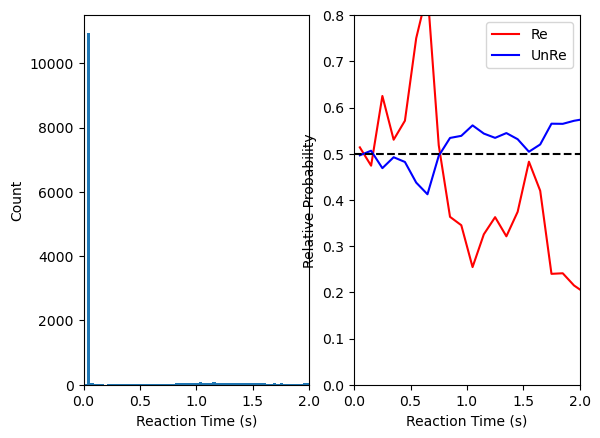

--------------------------- GraLbl1718F ------------------------------


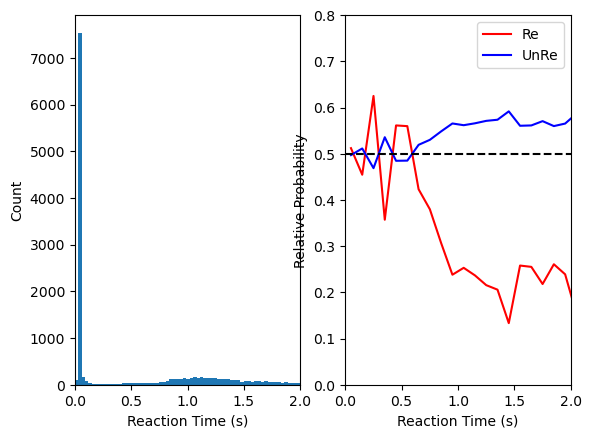

--------------------------- GraGre0917M ------------------------------


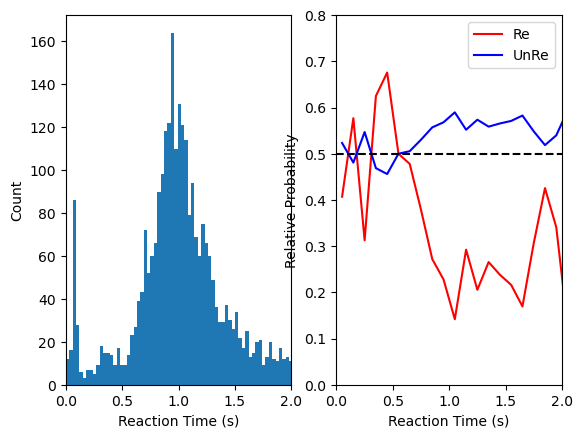

--------------------------- GraGra1918F ------------------------------


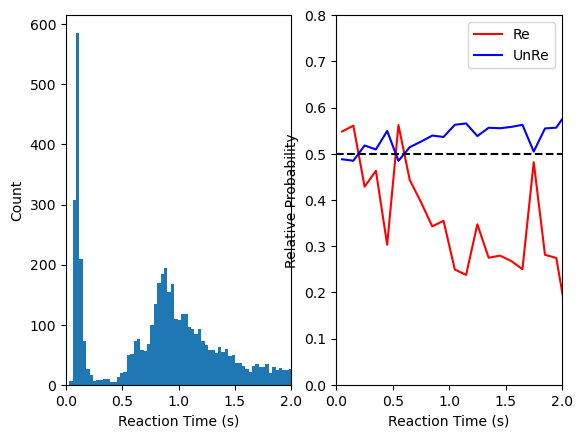

--------------------------- LblWhi1566M ------------------------------


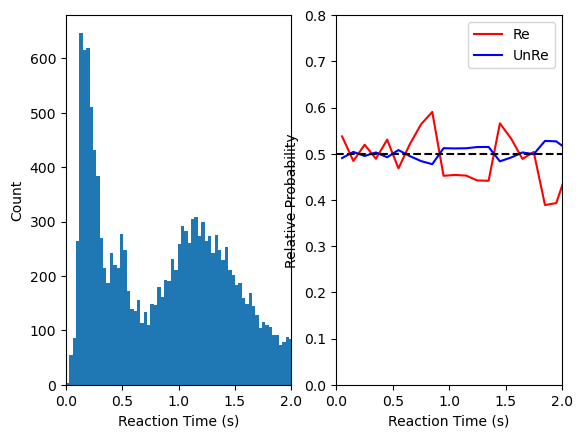

--------------------------- LblGra3039M ------------------------------


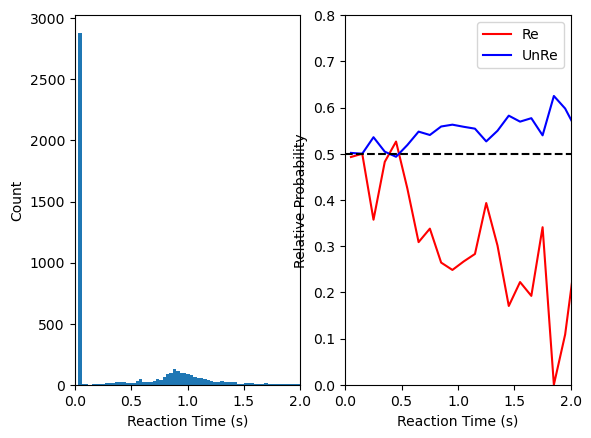

--------------------------- LblGra2826F ------------------------------


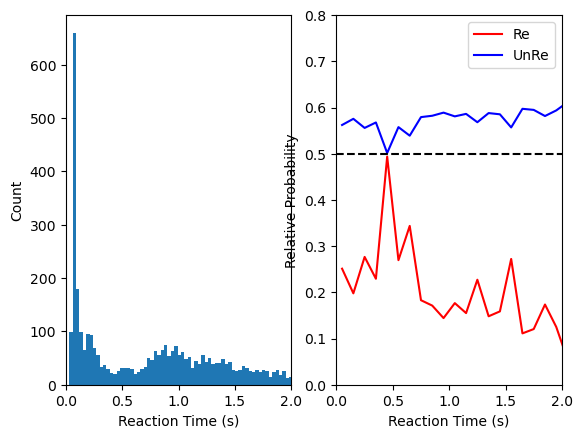

In [14]:
# Plot the probability of RT of Re vs UnRe as function of bin.

for ibird, bird in enumerate(bird_dates):
    print('---------------------------', bird, '------------------------------')

    countRe, bin_edgesRe = np.histogram(birdRTRe[ibird], bins=60, range = (0.0, 6.0)) 
    countUnRe, bin_edgesUnRe = np.histogram(birdRTUnRe[ibird], bins=60, range = (0.0, 6.0)) 

    xbinRe = (bin_edgesRe[0:-1] + bin_edgesRe[1:])/2.0
    xbinUnRe = (bin_edgesUnRe[0:-1] + bin_edgesUnRe[1:])/2.0

    countTot = countRe + countUnRe

    pRe = (countRe/countTot)/(2*0.2)
    pNoRe = (countUnRe/countTot)/(2*0.8)

    plt.subplot(1,2,1)
    plt.hist(birdRT[ibird], bins=200, range = (0, 6.0))
    plt.xlabel('Reaction Time (s)')
    plt.ylabel("Count")
    plt.xlim([0, 2.0])
   

    plt.subplot(1,2,2)
    plt.plot(xbinRe, pRe, '-r', label = 'Re')
    plt.plot(xbinUnRe, pNoRe, '-b', label = 'UnRe')
    plt.plot([0, 6.0], [0.5, 0.5], 'k--')
    plt.xlim([0, 2.0])
    plt.ylim((0.0, 0.8))
    plt.xlabel('Reaction Time (s)')
    plt.ylabel('Relative Probability')
    plt.legend()
    plt.show()